# Calibration View

In [1]:
from config.settings import OutPath, PlotsPath, positions, linear_popt
from config.plot_config import set_plot_style; set_plot_style()

from utils.functions import linear
from utils.functions import gaussian

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

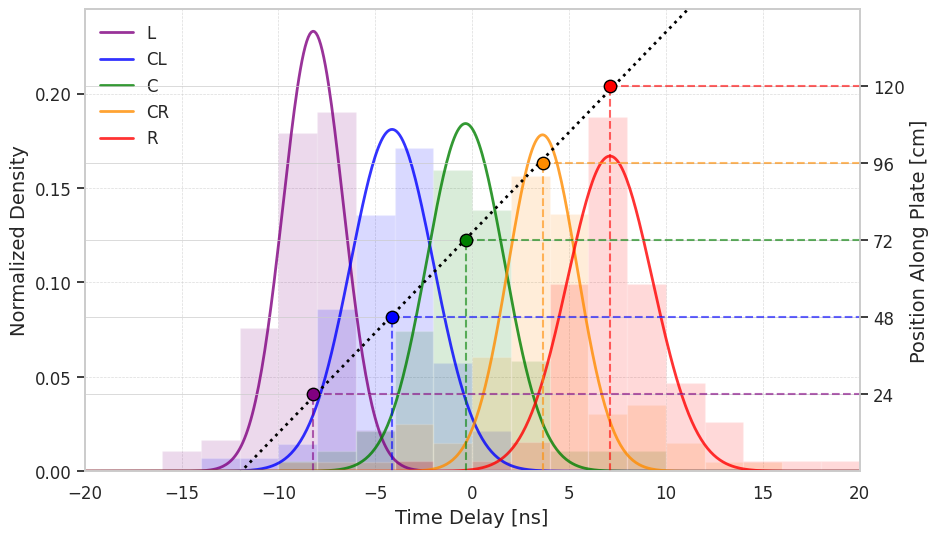

In [2]:
# File Paths and Labels
x_positions = [24, 48, 72, 96, 120]
colors = ['purple', 'blue', 'green', 'darkorange', 'red']
labels = ['L', 'CL', 'C', 'CR', 'R']
histograms = []
mean_values = []

# Load histograms from .npy files
for label in labels:
    file_path = os.path.join(OutPath, f"{label}.npy")
    histograms.append(np.load(file_path))

# Initialize figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms with improved transparency
bins = np.arange(-20, 21, 2)
for i, hist in enumerate(histograms):
    ax.hist(hist, bins=bins, alpha=0.15, density=True, color=colors[i]) #, label=f"{labels[i]} Histogram")

# Initial Gaussian fit parameters
initial_guesses = [[25, -5, 2], [25, -2, 2], [25, 0, 2], [25, 2, 2], [25, 5, 2]]
bins = np.arange(-20.5, 20.5, 1)

# Fit each histogram with a Gaussian
for idx, hist in enumerate(histograms):
    hist_counts, bin_edges = np.histogram(hist, bins=bins, density=True)
    bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
    popt, _ = curve_fit(gaussian, bin_centers, hist_counts, p0=initial_guesses[idx])

    mean_values.append(popt[1])

    # Smooth Gaussian curve
    x_vals = np.linspace(-20, 20, 500)
    ax.plot(x_vals, gaussian(x_vals, *popt), label=f"{labels[idx]}", color=colors[idx], alpha=0.8, linewidth=2)

# Formatting primary axis (Histograms)
ax.set_xlim(-20,20)
ax.set_xlabel("Time Delay [ns]", fontsize=14)
ax.set_ylabel("Normalized Density", fontsize=14)
ax.legend(loc="upper left", fontsize=12, frameon=False)
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Secondary Y-axis for mean positions
ax2 = ax.twinx()

# Scatter plot of Gaussian means with enhancements
for i, mean in enumerate(mean_values):
    ax2.scatter(mean, x_positions[i], color=colors[i], edgecolor='black', s=80, zorder=3)
    
    # Horizontal line extending from mean value to twin y-axis
    ax2.plot([mean, 20], [x_positions[i], x_positions[i]], linestyle="dashed", color=colors[i], alpha=0.6)

    ax2.plot([mean, mean], [0, x_positions[i]], linestyle="dashed", color=colors[i], alpha=0.6)

# Linear fit line
t_vals = np.linspace(-12, 12, 100)
ax2.plot(t_vals, linear(t_vals, *linear_popt), color='black', linestyle='dotted', linewidth=2, label = "Linear Fit")

# Formatting secondary axis
ax2.set_ylabel("Position Along Plate [cm]", fontsize=14)
ax2.set_ylim(0, 144)
ax2.set_yticks(x_positions)

savefig = os.path.join(PlotsPath, 'calib_nice.png')
plt.savefig(savefig, dpi = 450)

plt.show()